<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Подключение-библиотек" data-toc-modified-id="Подключение-библиотек-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подключение библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Пример" data-toc-modified-id="Пример-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Пример</a></span><ul class="toc-item"><li><span><a href="#Обучение-модели-на-не-преобразованных-данных" data-toc-modified-id="Обучение-модели-на-не-преобразованных-данных-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Обучение модели на не преобразованных данных</a></span></li><li><span><a href="#Обучение-модели-на-преобразованных-данных" data-toc-modified-id="Обучение-модели-на-преобразованных-данных-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Обучение модели на преобразованных данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Первый-способ" data-toc-modified-id="Первый-способ-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Первый способ</a></span></li><li><span><a href="#Второй-способ" data-toc-modified-id="Второй-способ-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Второй способ</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

# Шифрование персональных данных

## Описание проекта

Нужно защитить данные клиентов страховой компании. 

Нужно защитить данные так, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

## Подключение библиотек 

In [1]:
import pandas as pd

!pip install seaborn -U
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 283 kB 1.2 MB/s eta 0:00:01


## Загрузка данных

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [5]:
data['Пол'].unique()

array([1, 0])

In [6]:
data['Возраст'].describe()

count    5000.000000
mean       30.952800
std         8.440807
min        18.000000
25%        24.000000
50%        30.000000
75%        37.000000
max        65.000000
Name: Возраст, dtype: float64

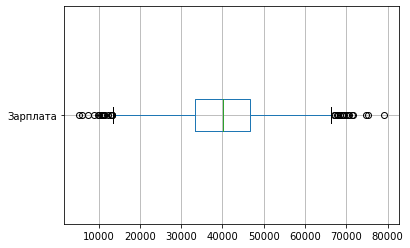

In [7]:
data.boxplot('Зарплата', vert=False)

In [8]:
data['Зарплата'].describe()

count     5000.000000
mean     39916.360000
std       9900.083569
min       5300.000000
25%      33300.000000
50%      40200.000000
75%      46600.000000
max      79000.000000
Name: Зарплата, dtype: float64

Зарплаты очень маленькие, но мы не знает за какой временной период данные, возможно это 2000-ее или 90-ее годы.

In [9]:
data['Члены семьи'].unique()

array([1, 0, 2, 4, 3, 5, 6])

In [10]:
data['Страховые выплаты'].unique()

array([0, 1, 2, 3, 5, 4])

### Вывод

Наши данные в полном порядке, можно перевезти поля Возраст и Зарплата в тип int, но это не критично.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Если модель будет заново обучена, то качество модели не изменится при условии, что вектор запроса будет умножен на P

**Обоснование:** $$w = ((X*P)^T (X*P))^{-1} (X*P)^T y =>$$ $$w = (X*P)^{-1}((X*P)^T)^{-1} (X*P)^T y =>$$
Так как умножение матриц ассоциативно $((X*P)^T)^{-1} (X*P)^T$ даст $E$ и $w = (X*P)^{-1} y$. Подставим это выражение в формулу для предсказания, обозначив вектор запроса как $\overline{X}$
$$a = \overline{X}(X*P)^{-1} y$$
Таким образом, становиться понятно, что для сокращения P вектор запроса также необходимо умножить на P
$$a = \overline{X}P(X*P)^{-1} y =>$$ $$a = \overline{X}PP^{-1}X^{-1} y =>$$ $$a = \overline{X}X^{-1} y$$
Как известно  $X^{-1} y$ параметры  системы линейных уровнений. В нашем случаи они равны $w$. Подставим $w$ в итоговую формулу, получим исходное вырожения.
$$a = \overline{X}w$$

### Пример 

#### Обучение модели на не преобразованных данных  

In [11]:
def split_x_y(data, column):
    x = data.drop(column, axis=1)
    y = data[column]
    return x, y

In [12]:
def my_train_test_split(data):
    df_train, df_test = train_test_split(data, test_size=0.25, random_state=12345)
    
    df_train_x, df_train_y = split_x_y(df_train,'Страховые выплаты')
    df_test_x, df_test_y = split_x_y(df_test,'Страховые выплаты')
    
    return df_train_x, df_train_y, df_test_x, df_test_y

In [13]:
def train_linear_regression(train_x, train_y):
    model = LinearRegression()
    model.fit(train_x, train_y)
    return model

In [14]:
train_x, train_y, test_x, test_y = my_train_test_split(data)
model = train_linear_regression(train_x, train_y)

In [15]:
predicted_valid = model.predict(test_x)

In [16]:
r2_score(test_y, predicted_valid)

0.43522757127026657

#### Обучение модели на преобразованных данных  

In [17]:
def get_inv_matrix(matrix):
    try:
        return np.linalg.inv(matrix)
    except:
        return np.array()

In [18]:
def get_matrices(size = 4):
    while(True):
        P = np.random.randint(100, size = (size, size))
        P_inx = get_inv_matrix(P)
        if P_inx.size != 0:
            return P, P_inx

In [19]:
P, P_inv = get_matrices()

In [20]:
second_train_x = np.dot(train_x, P)
model_inv = train_linear_regression(second_train_x, train_y)

In [21]:
second_test_x =  np.dot(test_x, P)
predicted_valid = model_inv.predict(second_test_x)

In [22]:
r2_score(test_y, predicted_valid)

0.4352275712701045

#### Вывод

Как видно качество моделей абсолютно идентично 

## Алгоритм преобразования

**Алгоритм**

Для кодирования персональных данных, мы может сгенерировать любую обратимую матрицу, перемножить исходные данные с ней (она должна стоять слева от Х) и отправить зашифрованный результат в модель. При получении ответа, для расшифровки необходимо умножить выход модели на обратную матрицу 

**Обоснование**

$$a = PXw =>$$ $$P^{-1}a = P^{-1}PXw =>$$ $$ P^{-1}a = Xw$$

## Проверка алгоритма

In [23]:
P, P_inv = get_matrices(test_x.shape[0])

In [24]:
second_test_x = np.dot(P, test_x)

In [25]:
predicted = model.predict(second_test_x)

In [26]:
predicted_valid = np.dot(P_inv, predicted.T)
r2_score(test_y, predicted_valid)

-3.688526067163596

In [27]:
r2_score(test_y, model.predict(test_x))

0.43522757127026657

Качество не совпала, однако исследовав данную проблему, мы обратились к исходным  кодам библиотеки sklearn. Там функция predict определена следующим образом 

In [28]:
def _decision_function(self, X):
        check_is_fitted(self)

        X = check_array(X, accept_sparse=['csr', 'csc', 'coo'])
        return safe_sparse_dot(X, self.coef_.T,
                               dense_output=True) + self.intercept_

def predict(self, X):
    """
    Predict using the linear model.
    Parameters
    ----------
    X : array_like or sparse matrix, shape (n_samples, n_features)
        Samples.
    Returns
    -------
    C : array, shape (n_samples,)
        Returns predicted values.
    """
    return self._decision_function(X)

Видно, что помимо умножения в предсказание также добавляется смещение (self.intercept_). Таким образом у нас есть два способа кодирование без ущерба для качества:

    - при расшифровки добавить self.intercept_ к результату  
    - обучить модель без смещения 

### Первый способ 

In [29]:
r2_score(test_y, predicted_valid + model.intercept_)

0.4354199025676262

### Второй способ 

In [30]:
model = LinearRegression(fit_intercept=False)
model.fit(train_x, train_y)

LinearRegression(fit_intercept=False)

In [31]:
predicted = model.predict(test_x)
r2_score(test_y, model.predict(test_x))

0.30464028238984564

In [32]:
P, P_inv = get_matrices(test_x.shape[0])

In [33]:
second_test_x = np.dot(P, test_x)

In [34]:
predicted = model.predict(second_test_x)

In [35]:
predicted_valid = np.dot(P_inv, predicted.T)
r2_score(test_y, predicted_valid)

0.3046402823926946

### Вывод

В обоих случаях качество совпало, что свидетельствует о правильности алгоритма шифрования 